In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import graphviz
from IPython.display import display

In [2]:
def scikitlearn_model(feature_num, X, y):
    """
    Use scikit-learn to train a decision tree model and return the model and the max depth of the tree
    param feature_num: the number of features
    param X: the feature matrix
    param y: the target vector
    return: the model and the max depth of the tree
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2060) # Use 80% of the data for training and 20% for testing
    max_index = 0
    max_accuracy = 0
    for i in range(1, feature_num): # No need to try range = 0, because no 0 depth, and max is the number of features
        model = DecisionTreeClassifier(criterion='gini', max_depth=i, min_samples_split=10, random_state=2060)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy >= max_accuracy: # get the max accuracy, if depth is the same, the later one will be chosen
            max_accuracy = accuracy
            max_index = i
        print(f'Max depth: {i}, Accuracy: {accuracy}')
    print(f'Max depth: {max_index}, Accuracy: {max_accuracy}')
    
    return model, max_index

Scikitlearn implementation on the Heart disease data:
Max depth: 1, Accuracy: 0.7658536585365854
Max depth: 2, Accuracy: 0.7609756097560976
Max depth: 3, Accuracy: 0.848780487804878
Max depth: 4, Accuracy: 0.8585365853658536
Max depth: 5, Accuracy: 0.8975609756097561
Max depth: 6, Accuracy: 0.926829268292683
Max depth: 7, Accuracy: 0.9414634146341463
Max depth: 8, Accuracy: 0.9463414634146341
Max depth: 9, Accuracy: 0.9414634146341463
Max depth: 10, Accuracy: 0.9414634146341463
Max depth: 11, Accuracy: 0.9414634146341463
Max depth: 12, Accuracy: 0.9414634146341463
Max depth: 13, Accuracy: 0.9414634146341463
Max depth: 8, Accuracy: 0.9463414634146341


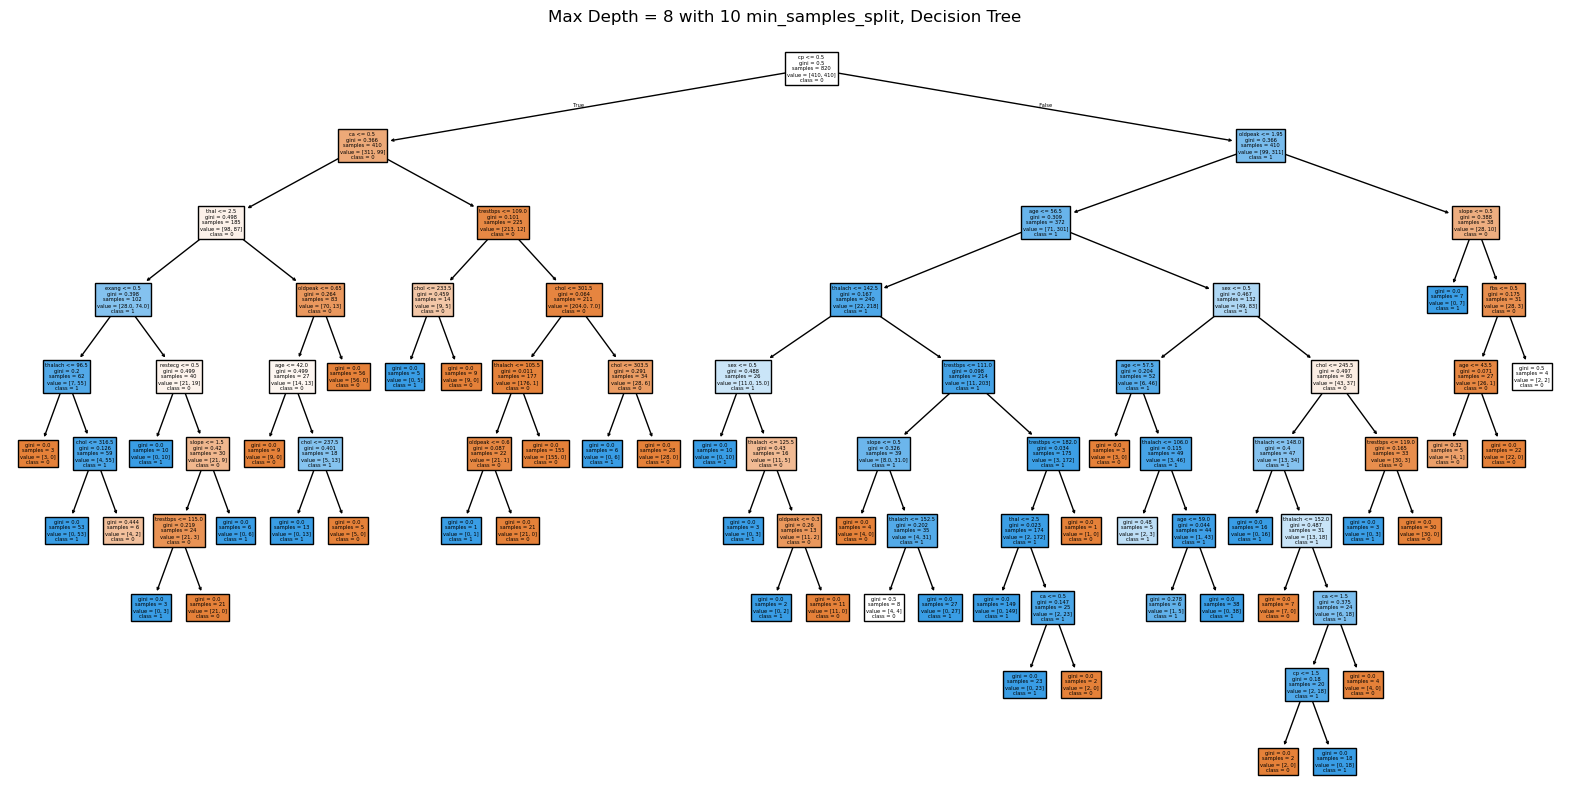

In [3]:
print("Scikitlearn implementation on the Heart disease data:")
data = pd.read_csv("../data/heart.csv")

X = data.drop(columns=['target'], axis=1) # Drop the target column
y = data['target']

model, max_depth = scikitlearn_model(14, X, y) # Call the function to get the model
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=[str(cls) for cls in model.classes_], filled=True)
plt.title(f"Max Depth = {max_depth} with 10 min_samples_split, Decision Tree")
plt.savefig("../graph/decision_tree_scikitlearn_heart.png")
plt.show()

Scikitlearn implementation on the Iris data:
Max depth: 1, Accuracy: 0.5
Max depth: 2, Accuracy: 0.9333333333333333
Max depth: 3, Accuracy: 0.9333333333333333
Max depth: 4, Accuracy: 0.9
Max depth: 3, Accuracy: 0.9333333333333333


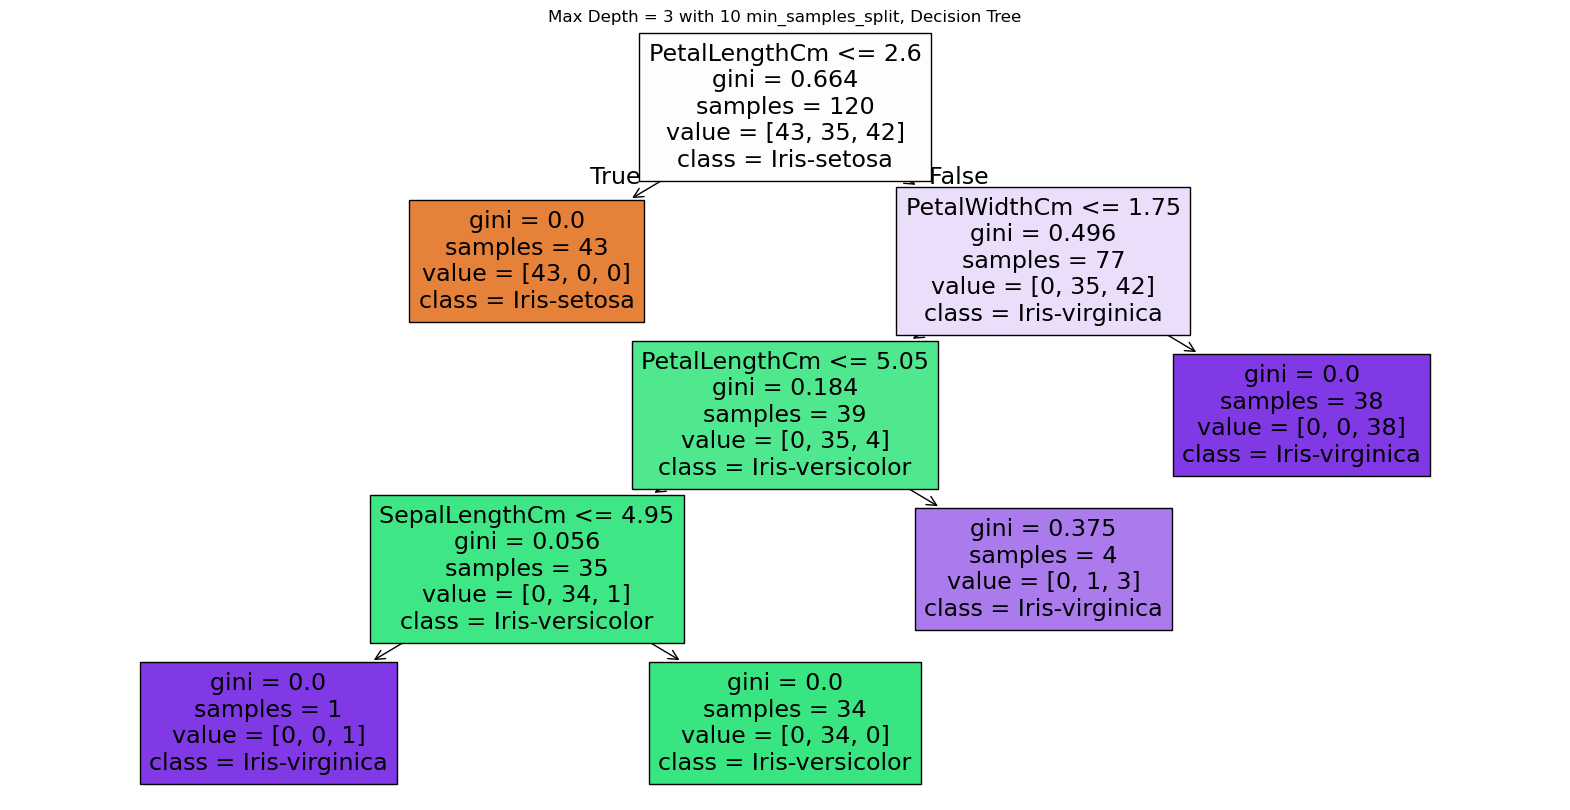

In [4]:
print("Scikitlearn implementation on the Iris data:")
df = pd.read_csv('../data/iris.csv')

X = df.drop(columns=['Id','Species'], axis=1)
y = df['Species']

model, max_depth = scikitlearn_model(5, X, y) # Call the function to get the model
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=[str(cls) for cls in model.classes_], filled=True)
plt.title(f"Max Depth = {max_depth} with 10 min_samples_split, Decision Tree")
plt.savefig("../graph/decision_tree_scikitlearn_iris.png")
plt.show()

# Code implementation without scikit-learn on Heart Disease Data

Columns:

id, age (continuous), sex (01), chestpain cp(1-4), trestbps (continuous), chol (continuous), fbs (01), restecg(continuous), thalach (continuous), exang(01), oldpeak(continuous), slope (categorical), ca(categorical), thal (categorical), num (target yes no)

In [8]:
def visualize_tree(tree):
    """
    Visualize the decision tree
    param tree: the decision tree
    return: the graph of the decision tree
    additional reference: https://graphviz.readthedocs.io/en/stable/manual.html
    """
    dot = graphviz.Digraph()
    def add_nodes_edges(node, dot, counter):
        """
        Add nodes and edges to the graph
        param node: the node of the decision tree
        param dot: the graph
        param counter: the counter
        return: the counter, which serves as the node id, required
        """
        if node is None:
            return counter # Check null node
        node_id = str(counter)
        if node.isleaf:
            label = f"Leaf\nLabel: {node.label}"
        else:
            label = (f"Feature {node.index_split_on}\n"
                     f"≤ {node.split_value:.2f}\n"
                     f"Gini: {node.info.get('gain', 0):.2f}\n"
                     f"Samples: {node.info.get('num_samples', 0)}") # Display the feature, split value, gini, and samples
        dot.node(node_id, label) # Add the node to the graph
        counter += 1 # Increment the counter (id counter)
        if node.left: 
            left_id = str(counter)
            counter = add_nodes_edges(node.left, dot, counter)
            dot.edge(node_id, left_id, label="True")
        if node.right:
            right_id = str(counter)
            counter = add_nodes_edges(node.right, dot, counter)
            dot.edge(node_id, right_id, label="False")
        # recursively add the left and right nodes
        return counter
    add_nodes_edges(tree.root, dot, 0)
    # get the graph and return
    return dot

In [16]:
def gini_for_node(data):
    """
    Get the gini index for the node
    param data: the dataset
    return: the gini index
    """
    labels = [row[-1] for row in data] # label is in the last column
    _, counts = np.unique(labels, return_counts=True)
    prob = counts / len(data)
    gini = 1 - np.sum(prob ** 2)
    return gini

def gini_for_split(data, left, right):
    """
    Get the gini index for the split
    param data: the dataset
    param left: the left split
    param right: the right split
    return: the gini index
    """
    # Calculate the gini index for the left and right nodes and return the weighted sum
    gini_left = gini_for_node(left)
    gini_right = gini_for_node(right)
    gini = (len(left) / len(data)) * gini_left + (len(right) / len(data)) * gini_right # weighted sum
    return gini

def continuous_split(data, feature, value):
    """
    Split the data based on the continuous feature
    param data: the dataset
    param feature: the feature to split on
    param value: the value to split on
    return: the left and right split
    """
    left = [row for row in data if row[feature] <= value]
    right = [row for row in data if row[feature] > value]
    return left, right

def cate_split(data, feature):
    """
    Split the data based on the categorical feature
    param data: the dataset
    param feature: the feature to split on
    return: the left and right split
    """
    feature_val = [row[feature] for row in data]
    val = np.mean(np.unique(feature_val)) # get the mean of the unique values
    left = [row for row in data if row[feature] == val]
    right = [row for row in data if row[feature] != val]
    return left, right

class Node:
    '''
    Helper to construct the tree structure.
    '''
    def __init__(self, left=None, right=None, depth=0, index_split_on=0, split_value = None, isleaf=False, label=1):
        self.left = left
        self.right = right
        self.depth = depth
        self.index_split_on = index_split_on
        self.split_value = split_value
        self.isleaf = isleaf
        self.label = label
        self.info = {}


    def _set_info(self, gain, num_samples):
        '''
        Helper function to add to info attribute.
        You do not need to modify this. 
        '''
        self.info['gain'] = gain
        self.info['num_samples'] = num_samples

# Existing functions like gini_for_node, gini_for_split, continuous_split, cate_split, Node class, and other functions are assumed to be available.

class DecisionTree:
    def __init__(self, data, max_depth=14, validation_data = None):
        self.min_sample_split = 10  # minimum number of samples required to split an internal node
        self.max_depth = max_depth
        labels = [row[-1] for row in data]  # get the labels last row
        self.majority_class = max(set(labels), key=labels.count)
        self.root = Node(label=self.majority_class)
        indices = list(range(len(data[0]) - 1))
        self.build_tree(self.root, data, indices)
        if validation_data is not None:
            self.prune(self.root, validation_data)

    def build_tree(self, node, data, indices):
        if self._is_terminal(node, data):  # check if the node is terminal
            node.isleaf = True
            node.label = self._get_majority_class(data)
            return

        best_feature, best_split, mini_gini = self.choose_split(data)  # get the best feature, split, and gini index
        if best_feature is None:
            node.isleaf = True
            node.label = self._get_majority_class(data)
            return

        node.index_split_on = best_feature
        node.split_value = best_split
        node._set_info(mini_gini, len(data))  # set the info attribute for the node to graph later

        feature_values = [row[best_feature] for row in data]
        unique_val = np.unique(feature_values)
        if len(unique_val) > 2:
            left_data, right_data = continuous_split(data, best_feature, best_split)  # continuous split
        else:
            left_data, right_data = cate_split(data, best_feature)

        node.left = Node(depth=node.depth + 1)  # create the left node with the depth + 1
        node.right = Node(depth=node.depth + 1)

        self.build_tree(node.left, left_data, indices)
        self.build_tree(node.right, right_data, indices)

    def prune(self, node, validation_data):
        """
        Prune the decision tree using post-pruning with validation data.
        param node: the node to start pruning from
        param validation_data: the validation dataset
        """
        if node.isleaf or node.left is None or node.right is None:
            return

        # Prune left and right subtrees first (post-order traversal)
        self.prune(node.left, validation_data)
        self.prune(node.right, validation_data)

        # If both children are leaves, consider pruning this node
        if node.left.isleaf and node.right.isleaf:
            # Calculate the loss before pruning
            loss_before_pruning = self.loss(validation_data)

            # Backup the current node's children
            left_backup = node.left
            right_backup = node.right

            # Make the current node a leaf and assign the majority class
            node.isleaf = True
            node.label = self._get_majority_class(validation_data)
            node.left = None
            node.right = None

            # Calculate the loss after pruning
            loss_after_pruning = self.loss(validation_data)

            # If pruning does not improve the loss, revert the changes
            if loss_after_pruning >= loss_before_pruning:
                node.isleaf = False
                node.left = left_backup
                node.right = right_backup

    def predict(self, features):
        return self._predict_recurs(self.root, features)

    def accuracy(self, data):
        return 1 - self.loss(data)

    def loss(self, data):
        cnt = 0.0
        test_Y = [row[-1] for row in data]
        for i in range(len(data)):
            prediction = self.predict(data[i])
            if prediction != test_Y[i]:
                cnt += 1.0
        return cnt / len(data)

    def _is_terminal(self, node, data):
        if len(data) == 0:
            return True
        if len(data) < self.min_sample_split:
            return True
        labels = [row[-1] for row in data]
        if len(set(labels)) == 1:
            return True
        if node.depth >= self.max_depth:
            return True
        return False

    def _get_majority_class(self, data):
        labels = [row[-1] for row in data]
        if labels:
            return max(set(labels), key=labels.count)
        return self.majority_class

    def _predict_recurs(self, node, row):
        if node.isleaf or node.index_split_on is None:
            return node.label
        split_index = node.index_split_on
        split_value = node.split_value
        if row[split_index] <= split_value:
            return self._predict_recurs(node.left, row)
        else:
            return self._predict_recurs(node.right, row)

    def choose_split(self, data):
        best_feature = None
        best_split = None
        mini_gini = float('inf')
        features = len(data[0])
        for f in range(features - 1):
            unique_val = np.unique([row[f] for row in data])
            sorted_data = sorted(data, key=lambda x: x[f])
            if len(unique_val) > 2:
                for i in range(len(data) - 1):
                    split = (sorted_data[i][f] + sorted_data[i + 1][f]) / 2
                    left, right = continuous_split(data, f, split)
                    if not left or not right:
                        continue
                    gini = gini_for_split(data, left, right)
                    if gini < mini_gini:
                        mini_gini = gini
                        best_feature = f
                        best_split = split
            else:
                left, right = cate_split(data, f)
                gini = gini_for_split(data, left, right)
                if gini < mini_gini:
                    mini_gini = gini
                    best_feature = f
                    best_split = np.mean(unique_val)
        return best_feature, best_split, mini_gini

# Example usage:
# tree = DecisionTree(training_data, max_depth=14)
# tree.prune(validation_data)


In [17]:
import numpy as np
import pandas as pd
from random import shuffle

# Existing functions like gini_for_node, gini_for_split, continuous_split, cate_split, Node class, and other functions are assumed to be available.

# Example usage with manually implemented cross-validation

data = pd.read_csv('../data/heart.csv')
object_columns = data.select_dtypes(include=['object']).columns.tolist()
for col in object_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # convert the object columns to numeric

X = data.drop(columns=['target']).to_numpy().tolist()  # drop the target column
y = data['target'].to_numpy().tolist()  # get the target column

# Shuffle the data
combined_data = list(zip(X, y))
shuffle(combined_data)
X, y = zip(*combined_data)

# Manually implement KFold cross-validation
k = 5
fold_size = len(X) // k
accuracies = []

for fold in range(k):
    # Define train and validation splits
    X_val = X[fold * fold_size:(fold + 1) * fold_size]
    y_val = y[fold * fold_size:(fold + 1) * fold_size]
    
    X_train = X[:fold * fold_size] + X[(fold + 1) * fold_size:]
    y_train = y[:fold * fold_size] + y[(fold + 1) * fold_size:]

    # Reconstruct the training data
    training_data = [features + [label] for label, features in zip(y_train, X_train)]
    tree = DecisionTree(training_data, max_depth=10)

    # Prune the tree using validation data
    validation_data = [features + [label] for label, features in zip(y_val, X_val)]
    tree.prune(tree.root, validation_data)

    # Calculate accuracy on validation data
    accuracy = tree.accuracy(validation_data)
    accuracies.append(accuracy)

# Calculate and print the average accuracy across all folds
avg_accuracy = np.mean(accuracies)
print(f"Average Cross-Validation Accuracy: {avg_accuracy:.2f}")

# Final training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2060)
training_data = [features + [label] for label, features in zip(y_train, X_train)]
tree = DecisionTree(training_data, max_depth=10)

# Prune the tree using part of the training data as validation data
validation_data = [features + [label] for label, features in zip(y_test, X_test)]
tree.prune(tree.root, validation_data)

# Calculate training and testing accuracy
training_accuracy = tree.accuracy(training_data)
print("Training Accuracy:", training_accuracy)

testing_data = [features + [label] for label, features in zip(y_test, X_test)]
testing_accuracy = tree.accuracy(testing_data)
print("Testing Accuracy:", testing_accuracy)

# Save the tree in the graph folder
# Assuming visualize_tree function exists
dot = visualize_tree(tree)
dot.render('../graph/testing_tree_heart', format='png', cleanup=True)


Average Cross-Validation Accuracy: 0.95
Training Accuracy: 0.9853658536585366
Testing Accuracy: 0.975609756097561


'..\\graph\\testing_tree_heart.png'

In [18]:
data = pd.read_csv('../data/heart.csv')
object_columns = data.select_dtypes(include=['object']).columns.tolist()
for col in object_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce') # convert the object columns to numeric

X = data.drop(columns=['target']).to_numpy().tolist() # drop the target column
y = data['target'].to_numpy().tolist() # get the target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2060)

data = [features + [label] for label, features in zip(y_train, X_train)] # reconstruct the data
tree = DecisionTree(data, max_depth=10)
accuracy = tree.accuracy(data)
print("training", accuracy)

data = [features + [label] for label, features in zip(y_test, X_test)]
accuracy = tree.accuracy(data)
print("testing", accuracy)

# Save the tree in the graph folder
dot = visualize_tree(tree)
dot.render('../graph/testing_tree_heart', format='png', cleanup=True)

training 0.9792682926829268
testing 0.9414634146341463


'..\\graph\\testing_tree_heart.png'

# On Iris Dataset

In [14]:
print("UC Providence implementation:")
data = pd.read_csv('../data/iris.csv')
object_columns = data.select_dtypes(include=['object']).columns.tolist()
for col in object_columns[:-1]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

X = data.drop(columns=['Id', 'Species']).to_numpy().tolist()
y = data['Species'].to_numpy().tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2060)

data = [features + [label] for label, features in zip(y_train, X_train)]
tree = DecisionTree(data, max_depth=5)
accuracy = tree.accuracy(data)
print("training", accuracy)

data = [features + [label] for label, features in zip(y_test, X_test)]
accuracy = tree.accuracy(data)
print("testing", accuracy)
dot = visualize_tree(tree)
dot.render('../graph/testing_tree_iris', format='png', cleanup=True)

UC Providence implementation:
training 0.9916666666666667
testing 0.9


'..\\graph\\testing_tree_iris.png'

In [19]:
print("UC Providence implementation:")
data = pd.read_csv('../data/iris.csv')
object_columns = data.select_dtypes(include=['object']).columns.tolist()
for col in object_columns[:-1]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

X = data.drop(columns=['Id', 'Species']).to_numpy().tolist()
y = data['Species'].to_numpy().tolist()

# Manually implement KFold cross-validation
k = 5
fold_size = len(X) // k
accuracies = []

for fold in range(k):
    # Define train and validation splits
    X_val = X[fold * fold_size:(fold + 1) * fold_size]
    y_val = y[fold * fold_size:(fold + 1) * fold_size]
    
    X_train = X[:fold * fold_size] + X[(fold + 1) * fold_size:]
    y_train = y[:fold * fold_size] + y[(fold + 1) * fold_size:]

    # Reconstruct the training data
    training_data = [features + [label] for label, features in zip(y_train, X_train)]
    tree = DecisionTree(training_data, max_depth=5)

    # Prune the tree using validation data
    validation_data = [features + [label] for label, features in zip(y_val, X_val)]
    tree.prune(tree.root, validation_data)

    # Calculate accuracy on validation data
    accuracy = tree.accuracy(validation_data)
    accuracies.append(accuracy)

# Calculate and print the average accuracy across all folds
avg_accuracy = np.mean(accuracies)
print(f"Average Cross-Validation Accuracy: {avg_accuracy:.2f}")

# Final training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2060)
training_data = [features + [label] for label, features in zip(y_train, X_train)]
tree = DecisionTree(training_data, max_depth=5)

# Prune the tree using part of the training data as validation data
validation_data = [features + [label] for label, features in zip(y_test, X_test)]
tree.prune(tree.root, validation_data)

# Calculate training and testing accuracy
training_accuracy = tree.accuracy(training_data)
print("Training Accuracy:", training_accuracy)

testing_data = [features + [label] for label, features in zip(y_test, X_test)]
testing_accuracy = tree.accuracy(testing_data)
print("Testing Accuracy:", testing_accuracy)

# Save the tree in the graph folder
# Assuming visualize_tree function exists
dot = visualize_tree(tree)
dot.render('../graph/testing_tree_iris', format='png', cleanup=True)


UC Providence implementation:
Average Cross-Validation Accuracy: 0.98
Training Accuracy: 0.9833333333333333
Testing Accuracy: 0.9333333333333333


'..\\graph\\testing_tree_iris.png'